# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/city.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cc = []
con_code=[]
cities=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    c_code=citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    cit=(city, c_code)
    
    # If the city is unique, then add it to a our cities list
    if cit not in cc:
        cc.append(cit)
    
    
        

# Print the city count to confirm sufficient count
len (cc)

642

In [3]:
for x in range(len(cc)):
    cities.append(cc[x][0])
    con_code.append(cc[x][1])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
test=f"http://api.openweathermap.org/data/2.5/weather?q=London&appid={weather_api_key}"
pprint(requests.get(test).json())


{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1592679254,
 'id': 2643743,
 'main': {'feels_like': 289.57,
          'humidity': 49,
          'pressure': 1018,
          'temp': 293.33,
          'temp_max': 295.37,
          'temp_min': 292.04},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1414,
         'sunrise': 1592624578,
         'sunset': 1592684479,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 190, 'speed': 5.1}}


In [4]:
city_data=[]
city_name=[]
latitude=[]
longitude =[]
Humidity=[]
Maxtemp=[]
Windspeed=[]
Cloudiness=[]
Date=[]
Country=[]

url="http://api.openweathermap.org/data/2.5/weather?q="
unit= "imperial"
#len(cities)
print("Beginning Data Retrieval")    
print("-----------------------------")
for x in range(len(cities)):
    query=url+cities[x]+","+con_code[x]+"&appid="+weather_api_key+"&units="+unit
    call=requests.get(query)
    response = call.json()
    print(f"Processing Record {x} of Set 1 |{cities[x]}")
    try:
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        Humidity.append(response["main"]["humidity"])
        Maxtemp.append(response["main"]["temp"])
        Country.append(response["sys"]["country"])
        Windspeed.append(response["wind"]["speed"])
        Cloudiness.append(response["clouds"]["all"])
        Date.append(response["dt"])
        print(f"{cities[x]} found! Appending stats")
        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        print("City not found")
        pass

print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")
    
    

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 |takoradi
takoradi found! Appending stats
Processing Record 1 of Set 1 |yulara
yulara found! Appending stats
Processing Record 2 of Set 1 |victoria
victoria found! Appending stats
Processing Record 3 of Set 1 |anloga
anloga found! Appending stats
Processing Record 4 of Set 1 |albany
albany found! Appending stats
Processing Record 5 of Set 1 |cape town
cape town found! Appending stats
Processing Record 6 of Set 1 |rikitea
rikitea found! Appending stats
Processing Record 7 of Set 1 |college
college found! Appending stats
Processing Record 8 of Set 1 |lagoa
lagoa found! Appending stats
Processing Record 9 of Set 1 |ushuaia
ushuaia found! Appending stats
Processing Record 10 of Set 1 |sao joao da barra
sao joao da barra found! Appending stats
Processing Record 11 of Set 1 |nizwa
nizwa found! Appending stats
Processing Record 12 of Set 1 |kolokani
kolokani found! Appending stats
Processing Record 13 of Set 1

Processing Record 117 of Set 1 |istok
istok found! Appending stats
Processing Record 118 of Set 1 |cascais
cascais found! Appending stats
Processing Record 119 of Set 1 |namatanai
namatanai found! Appending stats
Processing Record 120 of Set 1 |newcastleton
newcastleton found! Appending stats
Processing Record 121 of Set 1 |nalut
nalut found! Appending stats
Processing Record 122 of Set 1 |fortuna
fortuna found! Appending stats
Processing Record 123 of Set 1 |mount isa
mount isa found! Appending stats
Processing Record 124 of Set 1 |ponta delgada
ponta delgada found! Appending stats
Processing Record 125 of Set 1 |samarai
samarai found! Appending stats
Processing Record 126 of Set 1 |beavercreek
beavercreek found! Appending stats
Processing Record 127 of Set 1 |kutum
kutum found! Appending stats
Processing Record 128 of Set 1 |port hedland
port hedland found! Appending stats
Processing Record 129 of Set 1 |ambilobe
ambilobe found! Appending stats
Processing Record 130 of Set 1 |butarit

Processing Record 234 of Set 1 |glendive
glendive found! Appending stats
Processing Record 235 of Set 1 |oyotun
oyotun found! Appending stats
Processing Record 236 of Set 1 |bamiantong
bamiantong found! Appending stats
Processing Record 237 of Set 1 |havelock
havelock found! Appending stats
Processing Record 238 of Set 1 |marystown
marystown found! Appending stats
Processing Record 239 of Set 1 |coquimbo
coquimbo found! Appending stats
Processing Record 240 of Set 1 |xichang
xichang found! Appending stats
Processing Record 241 of Set 1 |grand river south east
City not found
Processing Record 242 of Set 1 |bambous virieux
bambous virieux found! Appending stats
Processing Record 243 of Set 1 |chuy
chuy found! Appending stats
Processing Record 244 of Set 1 |mumford
mumford found! Appending stats
Processing Record 245 of Set 1 |vao
vao found! Appending stats
Processing Record 246 of Set 1 |phan thiet
phan thiet found! Appending stats
Processing Record 247 of Set 1 |omsukchan
omsukchan foun

Processing Record 347 of Set 1 |gusinoye ozero
gusinoye ozero found! Appending stats
Processing Record 348 of Set 1 |marsh harbour
marsh harbour found! Appending stats
Processing Record 349 of Set 1 |neryungri
neryungri found! Appending stats
Processing Record 350 of Set 1 |tottori
tottori found! Appending stats
Processing Record 351 of Set 1 |saint anthony
City not found
Processing Record 352 of Set 1 |tukan
tukan found! Appending stats
Processing Record 353 of Set 1 |somanda
somanda found! Appending stats
Processing Record 354 of Set 1 |wenceslau braz
wenceslau braz found! Appending stats
Processing Record 355 of Set 1 |cervo
cervo found! Appending stats
Processing Record 356 of Set 1 |sao gabriel da cachoeira
sao gabriel da cachoeira found! Appending stats
Processing Record 357 of Set 1 |ulety
ulety found! Appending stats
Processing Record 358 of Set 1 |pangody
pangody found! Appending stats
Processing Record 359 of Set 1 |marawi
marawi found! Appending stats
Processing Record 360 o

Processing Record 460 of Set 1 |teahupoo
teahupoo found! Appending stats
Processing Record 461 of Set 1 |bilma
bilma found! Appending stats
Processing Record 462 of Set 1 |lompoc
lompoc found! Appending stats
Processing Record 463 of Set 1 |samusu
City not found
Processing Record 464 of Set 1 |mackay
mackay found! Appending stats
Processing Record 465 of Set 1 |palmas bellas
palmas bellas found! Appending stats
Processing Record 466 of Set 1 |yeppoon
yeppoon found! Appending stats
Processing Record 467 of Set 1 |maniitsoq
maniitsoq found! Appending stats
Processing Record 468 of Set 1 |aykhal
aykhal found! Appending stats
Processing Record 469 of Set 1 |caravelas
caravelas found! Appending stats
Processing Record 470 of Set 1 |coihaique
coihaique found! Appending stats
Processing Record 471 of Set 1 |axim
axim found! Appending stats
Processing Record 472 of Set 1 |arua
arua found! Appending stats
Processing Record 473 of Set 1 |batabano
batabano found! Appending stats
Processing Record

Processing Record 576 of Set 1 |sevsk
sevsk found! Appending stats
Processing Record 577 of Set 1 |sorland
sorland found! Appending stats
Processing Record 578 of Set 1 |ngukurr
City not found
Processing Record 579 of Set 1 |kalmunai
kalmunai found! Appending stats
Processing Record 580 of Set 1 |monrovia
monrovia found! Appending stats
Processing Record 581 of Set 1 |ilhabela
ilhabela found! Appending stats
Processing Record 582 of Set 1 |sorong
sorong found! Appending stats
Processing Record 583 of Set 1 |tuatapere
tuatapere found! Appending stats
Processing Record 584 of Set 1 |konskie
konskie found! Appending stats
Processing Record 585 of Set 1 |norman wells
norman wells found! Appending stats
Processing Record 586 of Set 1 |itacarambi
itacarambi found! Appending stats
Processing Record 587 of Set 1 |toul
toul found! Appending stats
Processing Record 588 of Set 1 |nurota
nurota found! Appending stats
Processing Record 589 of Set 1 |mihaileni
mihaileni found! Appending stats
Proces

In [26]:
#Include a print log of each city as it's being processed with the city number and city name.



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pimentel
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | pangai
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | watsa
Processing Record 14 of Set 1 | rosetta
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | u

Processing Record 38 of Set 4 | tres picos
Processing Record 39 of Set 4 | saint-francois
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | mackay
Processing Record 42 of Set 4 | kirakira
Processing Record 43 of Set 4 | banda aceh
Processing Record 44 of Set 4 | bang saphan
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | san juan
Processing Record 47 of Set 4 | waingapu
Processing Record 48 of Set 4 | santa isabel
Processing Record 49 of Set 4 | turukhansk
Processing Record 0 of Set 5 | saurimo
Processing Record 1 of Set 5 | ambon
Processing Record 2 of Set 5 | ambulu
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | beringovskiy
Processing Record 7 of Set 5 | sobolevo
Processing Record 8 of Set 5 | tateyama
Processing Record 9 of Set 5 | shambu
Processing Record 10 of Set 5 | dingle
Processing Record 11 of Set 5 | nizhneyansk
City not found. Ski

Processing Record 28 of Set 8 | mongomo
Processing Record 29 of Set 8 | hunza
City not found. Skipping...
Processing Record 30 of Set 8 | bow island
Processing Record 31 of Set 8 | moerai
Processing Record 32 of Set 8 | xichang
Processing Record 33 of Set 8 | sakhnovshchyna
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | santa rosa
Processing Record 36 of Set 8 | severo-yeniseyskiy
Processing Record 37 of Set 8 | madera
Processing Record 38 of Set 8 | rizhao
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | bani
Processing Record 41 of Set 8 | awjilah
Processing Record 42 of Set 8 | miles city
Processing Record 43 of Set 8 | ulaanbaatar
Processing Record 44 of Set 8 | lagoa
Processing Record 45 of Set 8 | syasstroy
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | east london
Processing Record 48 of Set 8 | karakol
Processing Record 49 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 0 of Set 9 | andr

Processing Record 14 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 12 | adeje
Processing Record 16 of Set 12 | simpang
Processing Record 17 of Set 12 | athabasca
Processing Record 18 of Set 12 | prince rupert
Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | sayyan
Processing Record 21 of Set 12 | figline valdarno
Processing Record 22 of Set 12 | srednekolymsk
Processing Record 23 of Set 12 | kapit
Processing Record 24 of Set 12 | erenhot
Processing Record 25 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 26 of Set 12 | toftir
City not found. Skipping...
Processing Record 27 of Set 12 | agdam
Processing Record 28 of Set 12 | indianola
Processing Record 29 of Set 12 | honiton
Processing Record 30 of Set 12 | batemans bay
Processing Record 31 of Set 12 | namtsy
Processing Record 32 of Set 12 | bonoua
Processing Record 33 of Set 12 | aracati
Processing Record 34 of Set 12 | mareeba
Processing Record 35 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
Weather_df=pd.DataFrame({"City Name":city_name,"Lat": latitude,"Lng":longitude, "Humidity":Humidity, 
                        "Max Temp": Maxtemp,"Country":Country,"Wind Speed": Windspeed, 
                        "Cloudiness": Cloudiness, "Date": Date})
W_df=Weather_df.dropna()
W_df.head()

,City Name,Lat,Lng,Humidity,Max Temp,Country,Wind Speed,Cloudiness,Date
0,Takoradze,4.88,-1.76,87,77.0,GH,10.98,98,1592704434
1,Yulara,-25.24,130.99,37,55.4,AU,10.29,0,1592704216
2,Victoria,-4.62,55.45,83,80.6,SC,10.67,75,1592704434
3,Anloga,5.79,0.90,94,75.2,GH,4.70,20,1592704434
4,Albany,-35.02,117.89,76,48.2,AU,5.82,0,1592704434


City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
W_df.to_csv(output_data_file,index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

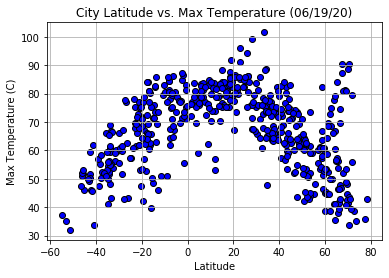

In [10]:
x1=W_df["Lat"]
y1=W_df["Max Temp"]
plt.grid()
plt.scatter(x1,y1,edgecolor="black",facecolor="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (06/19/20)")
plt.savefig("../Images/City Latitude vs. Max Temperature.png")
plt.show()



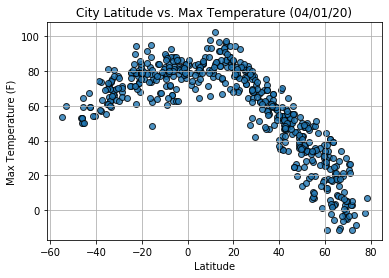

## Latitude vs. Humidity Plot

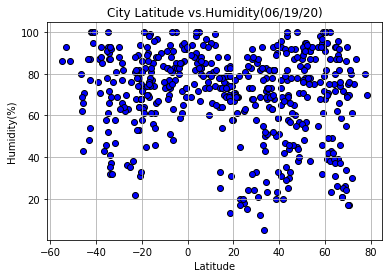

In [11]:
x=W_df["Lat"]
y4=W_df["Humidity"]
plt.grid()
plt.scatter(x,y4,edgecolor="black",facecolor="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs.Humidity(06/19/20)")
plt.savefig("../Images/City Latitude vs.Humidity.png")
plt.show()

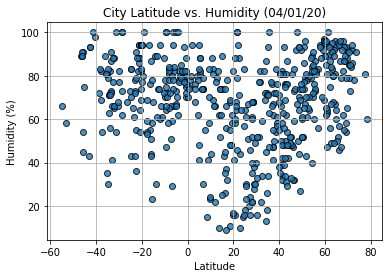

## Latitude vs. Cloudiness Plot

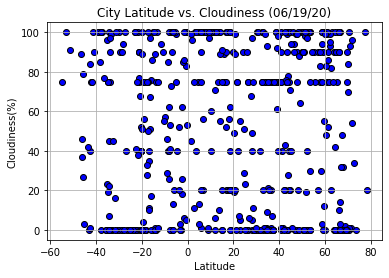

In [12]:
x=W_df["Lat"]
y2=W_df["Cloudiness"]
plt.grid()
plt.scatter(x1,y2,edgecolor="black",facecolor="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness (06/19/20)")
plt.savefig("../Images/City Latitude vs.Cloudiness.png")
plt.show()

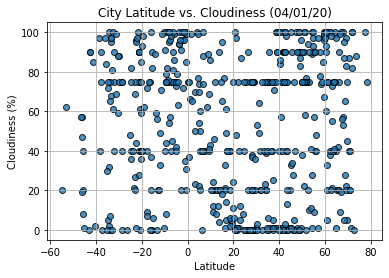

## Latitude vs. Wind Speed Plot

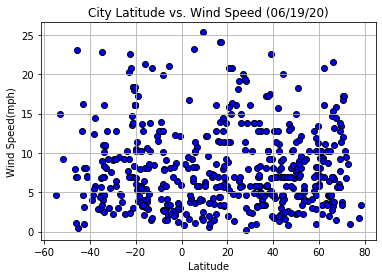

In [13]:
x=W_df["Lat"]
y3=W_df["Wind Speed"]
plt.grid()
plt.scatter(x,y3,edgecolor="black",facecolor="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Wind Speed (06/19/20)")
plt.savefig("../Images/City Latitude vs.Wind Speed.png")
plt.show()

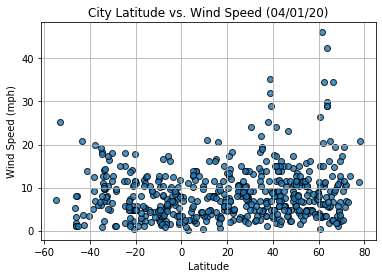

## Linear Regression

In [47]:
# OPTIONAL: Create a function to create Linear Regression plots
def Regression (x,y):
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x, y)
    regress_values = x * slope + intercept
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(min(x),min(y)),fontsize=15,color="red")
    plt.show()
 
            
        

In [48]:
# Create Northern and Southern Hemisphere DataFrames
Nhem_df=W_df.loc[W_df["Lat"]>=0]
Shem_df=W_df.loc[W_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.42838152030348364


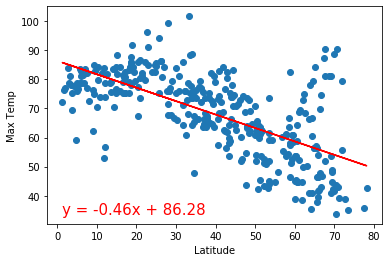

In [49]:
Latitude=Nhem_df["Lat"]
MaxTemp=Nhem_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
Regression(Latitude, MaxTemp)





The r-squared is: 0.8271188905041935


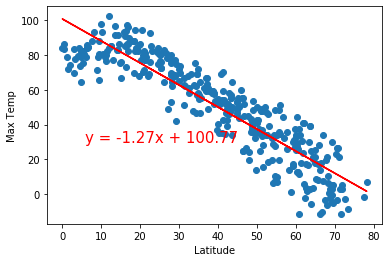

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5006510027275783


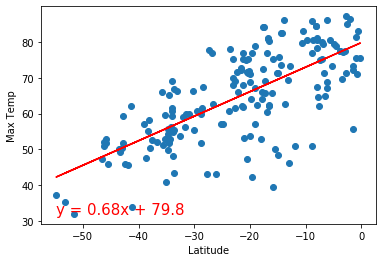

In [50]:
Latitude=Shem_df["Lat"]
MaxTemp=Shem_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
Regression(Latitude, MaxTemp)


The r-squared is: 0.39936284758885965


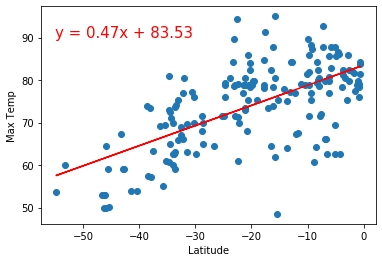

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.013281846430017


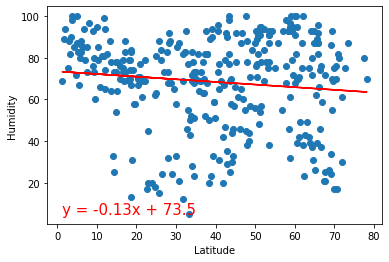

In [51]:
Latitude=Nhem_df["Lat"]
Humidity=Nhem_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
Regression(Latitude, Humidity)

The r-squared is: 0.10829462153873139


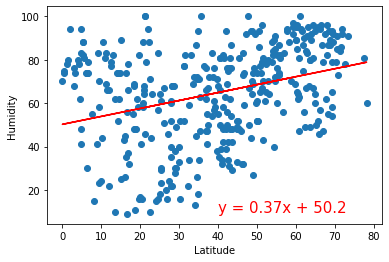

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.011173032980049367


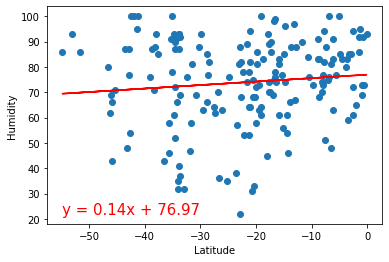

In [52]:
Latitude=Shem_df["Lat"]
Humidity=Shem_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
Regression(Latitude, Humidity)

The r-squared is: 0.0008996079328825663


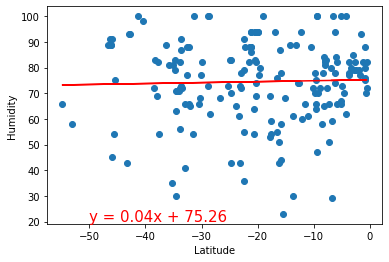

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 3.0320774060256004e-05


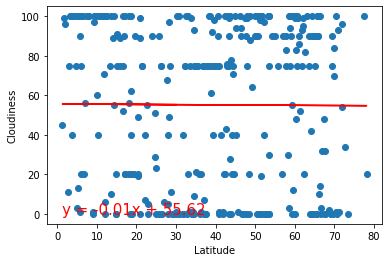

In [53]:
Latitude=Nhem_df["Lat"]
Cloudiness=Nhem_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
Regression(Latitude, Cloudiness)

The r-squared is: 0.05768812657005063


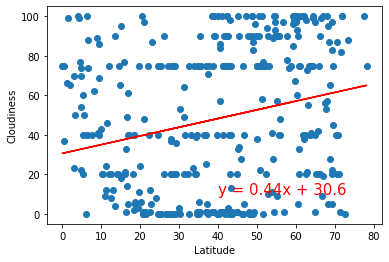

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 3.163788807322097e-05


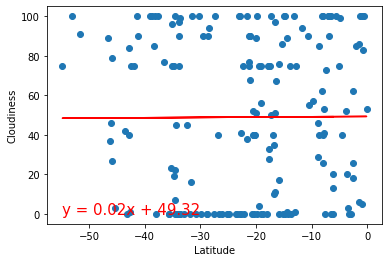

In [54]:
Latitude=Shem_df["Lat"]
Cloudiness=Shem_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
Regression(Latitude, Cloudiness)

The r-squared is: 0.0684912094859049


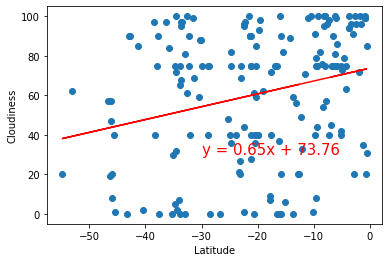

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 7.24009895166e-05


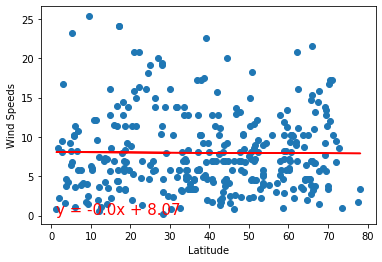

In [55]:
Latitude=Nhem_df["Lat"]
WindSpeed=Nhem_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")
Regression(Latitude, WindSpeed)

The r-squared is: 0.023371104533850804


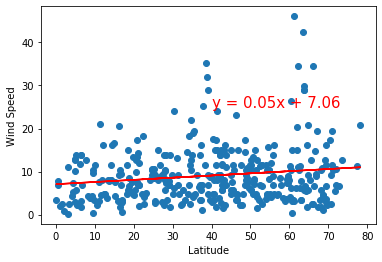

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006321733809489636


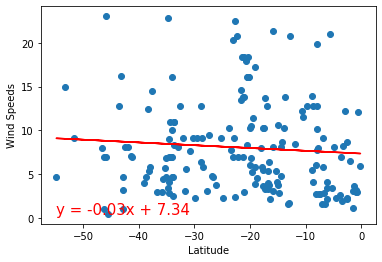

In [56]:
Latitude=Shem_df["Lat"]
WindSpeed=Shem_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")
Regression(Latitude, WindSpeed)

The r-squared is: 0.03381889207758188


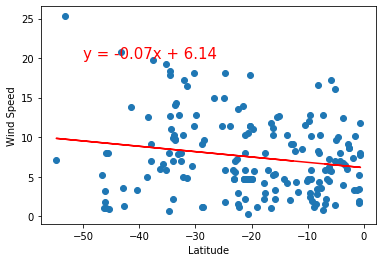